# Вычисления к работе 2.3.1А
### Удовин Илья, 874

In [1]:
import numpy as np
import pandas as pd
import math
from scipy.optimize import curve_fit
%matplotlib notebook
import matplotlib.pyplot as plt
from IPython.display import display

def create_plot(s1, s2):
    plt.minorticks_on()
    plt.grid(which='major')
    plt.grid(which='minor', linewidth=0.2)
    plt.xlabel(s1)
    plt.ylabel(s2)

## 1. Загрузим данные из файла.

In [2]:
data_table = pd.read_csv('data.csv', header=0, sep='\t')
data_table

,Unnamed: 0,date,COM2.001: TC 110,COM2.001: TC 110.1,COM2.005: MPT 100,COM2.002: PPT 100
0,0,(YYYY-MM-DD hh:mm:ss),P309: ActualSpd (Hz),P316: DrvPower (W),P740: Pressure (mbar),P740: Pressure (mbar)
1,1,"2019-03-13, 10:15:42",0,0,1000.0,220.0
2,2,"2019-03-13, 10:15:44",0,0,1000.0,210.0
3,3,"2019-03-13, 10:15:46",0,0,1000.0,220.0
4,4,"2019-03-13, 10:15:48",0,0,1000.0,220.0
5,5,"2019-03-13, 10:15:50",0,0,1000.0,210.0
6,6,"2019-03-13, 10:15:52",0,0,1000.0,220.0
7,7,"2019-03-13, 10:15:54",0,0,1000.0,210.0
8,8,"2019-03-13, 10:15:56",0,0,1000.0,220.0
9,9,"2019-03-13, 10:15:58",0,0,1000.0,220.0


In [3]:
data = np.array(data_table)
data = np.delete(data, 0, 0)
data = np.delete(data, 0, 1)
data = np.transpose(data)

time = data[0]
frequency = np.array(data[1], dtype=float)
wattage = np.array(data[2], dtype=float)
p2 = np.array(data[3], dtype=float)
p1 = np.array(data[4], dtype=float)

s = 0
for i in range(len(time)):
    time[i] = s
    s += 2
    
data = {}

<IPython.core.display.Javascript object>


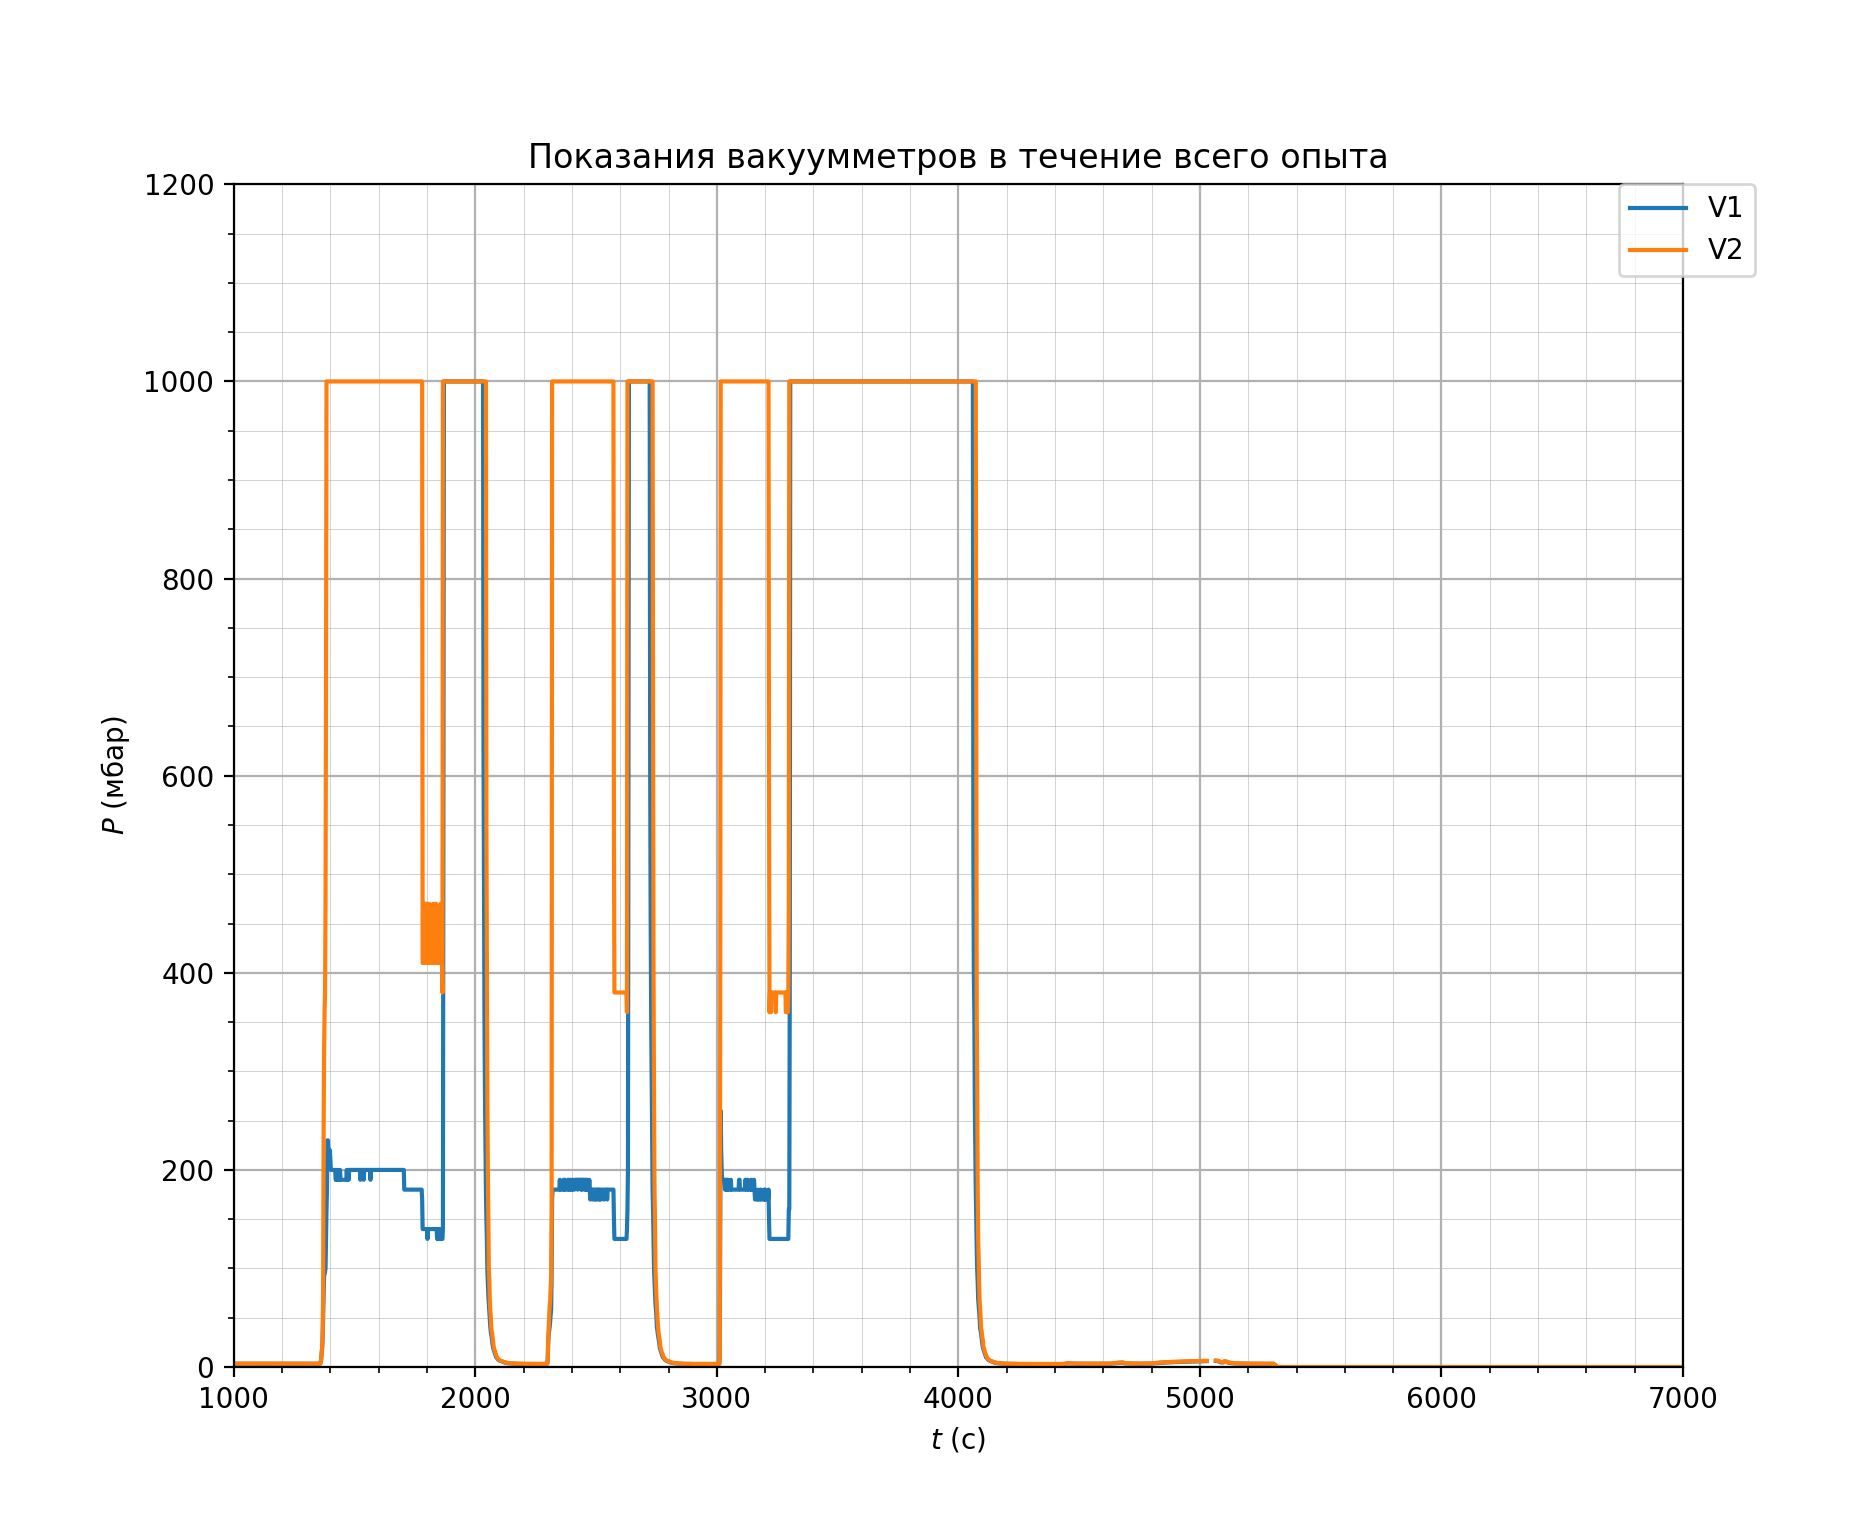

In [4]:
create_plot('$t$ (c)', '$P$ (мбар)')
plt.title('Показания вакуумметров в течение всего опыта')
plt.xlim(1000, 7000)
plt.ylim(0, 1200)
plt.plot(time, p1, label='V1')
plt.plot(time, p2, label='V2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)

Нулевая секунда в отсчете &mdash; 10:15:42.  
Объем считаем в **мл**, давление &mdash; в __мбар__, время &mdash; в **c**.

## 2.
Зная объём "запертого" в сильфоне воздуха ($V_0 = 265$ мл) определим, пользуясь законом Бойля-Мариотта, полный объём установки, высоковакуумной части (камера К), форвакуумной магистрали и самого насоса ТМН.

По закону Бойля-Мариотта, при постоянных температуре и массе газа $PV=\mbox{const}$. В сильфоне воздух находится при атмосферном давлении $P_0 \approx 1000$ мбар. Измеряя давление воздуха по мере заполнения им установки, определим объем ее частей.

In [5]:
v0 = 265                   # мл
p = [1000, 200, 180, 140]  # мбар (из данных)

v1 = p[0] * v0 / p[1] - v0
print('Объем вакуумной камеры:' + ' ' * 7, round(v1, 1), 'мл')
v2 = p[0] * v0 / p[2] - v0 - v1
print('Объем форвакуумной магистрали:', round(v2, 2), 'мл')
v3 = p[0] * v0 / p[3] - v0 - v1 - v2
print('Объем ТМН:' + ' ' * 20, round(v3, 2), 'мл')
print('Полный объем установки:' + ' ' * 7, round(v0 + v1 + v2 + v3, 1), 'мл')

Объем вакуумной камеры:        1060.0 мл
Объем форвакуумной магистрали: 147.22 мл
Объем ТМН:                     420.63 мл
Полный объем установки:        1892.9 мл


## 3. Оценим эффективную скорость откачки системы форвакуумным насосом.
Из файла возьмем данные зависимости давления в камере К от времени откачки насосом ДН. По зависимости $\ln P$ от $t$ определим постоянную времени откачки $\tau$ в диапазоне давлений $10^1$&mdash;$10^2$ мбар. Зная объём камеры К установки $V_0$, рассчитаем эффективную скорость ее откачки $S_0$. Определим суммарную пропускную способность соответствующих выходов U (включая диафрагмы).

$$\tau = \frac{V_0}{S_0}$$

<IPython.core.display.Javascript object>


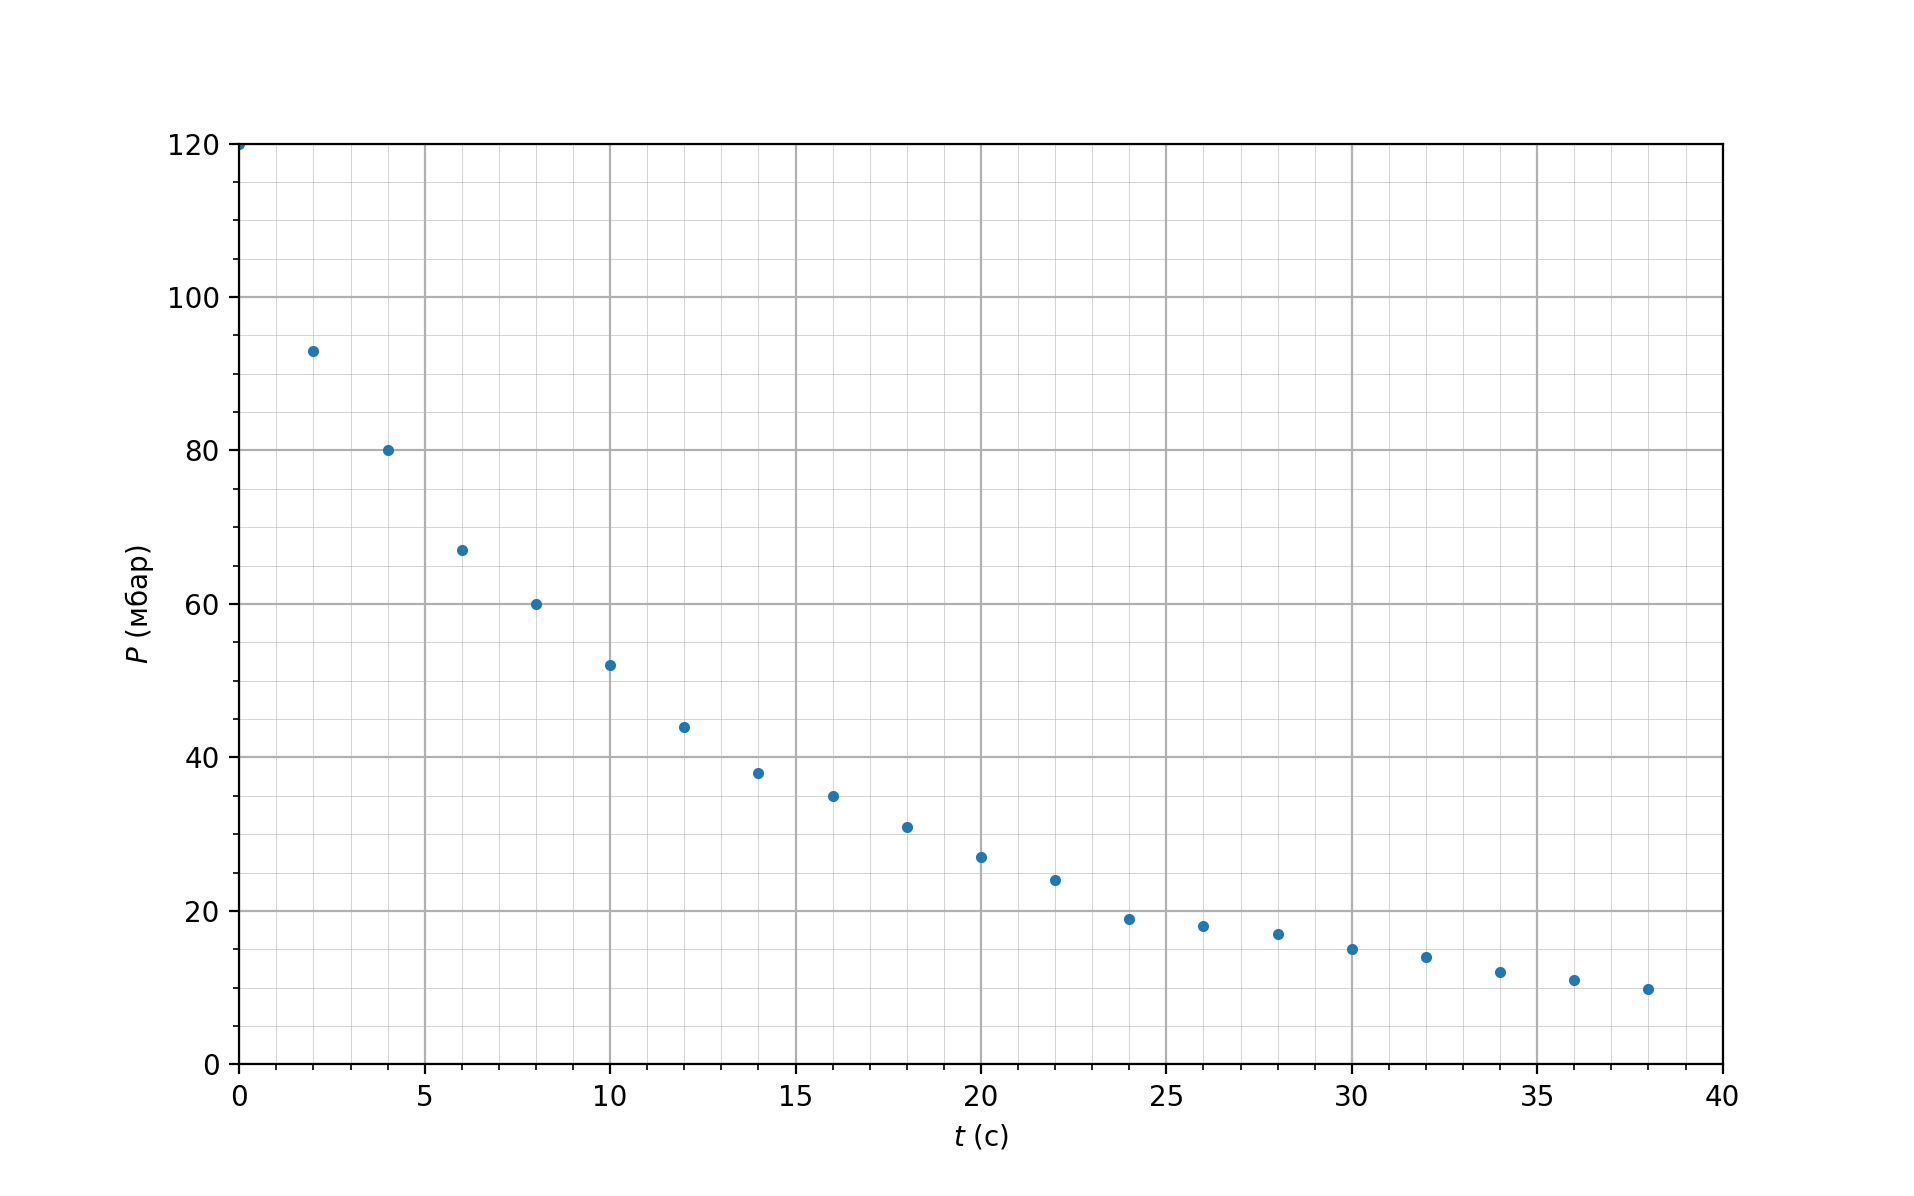

In [6]:
x0 = time[193:213] - time[193]
y0 = p1[193:213]
create_plot('$t$ (с)', '$P$ (мбар)')
plt.xlim(0, 40)
plt.ylim(0, 120)
plt.plot(x0, y0, linestyle='', marker='.')

<IPython.core.display.Javascript object>


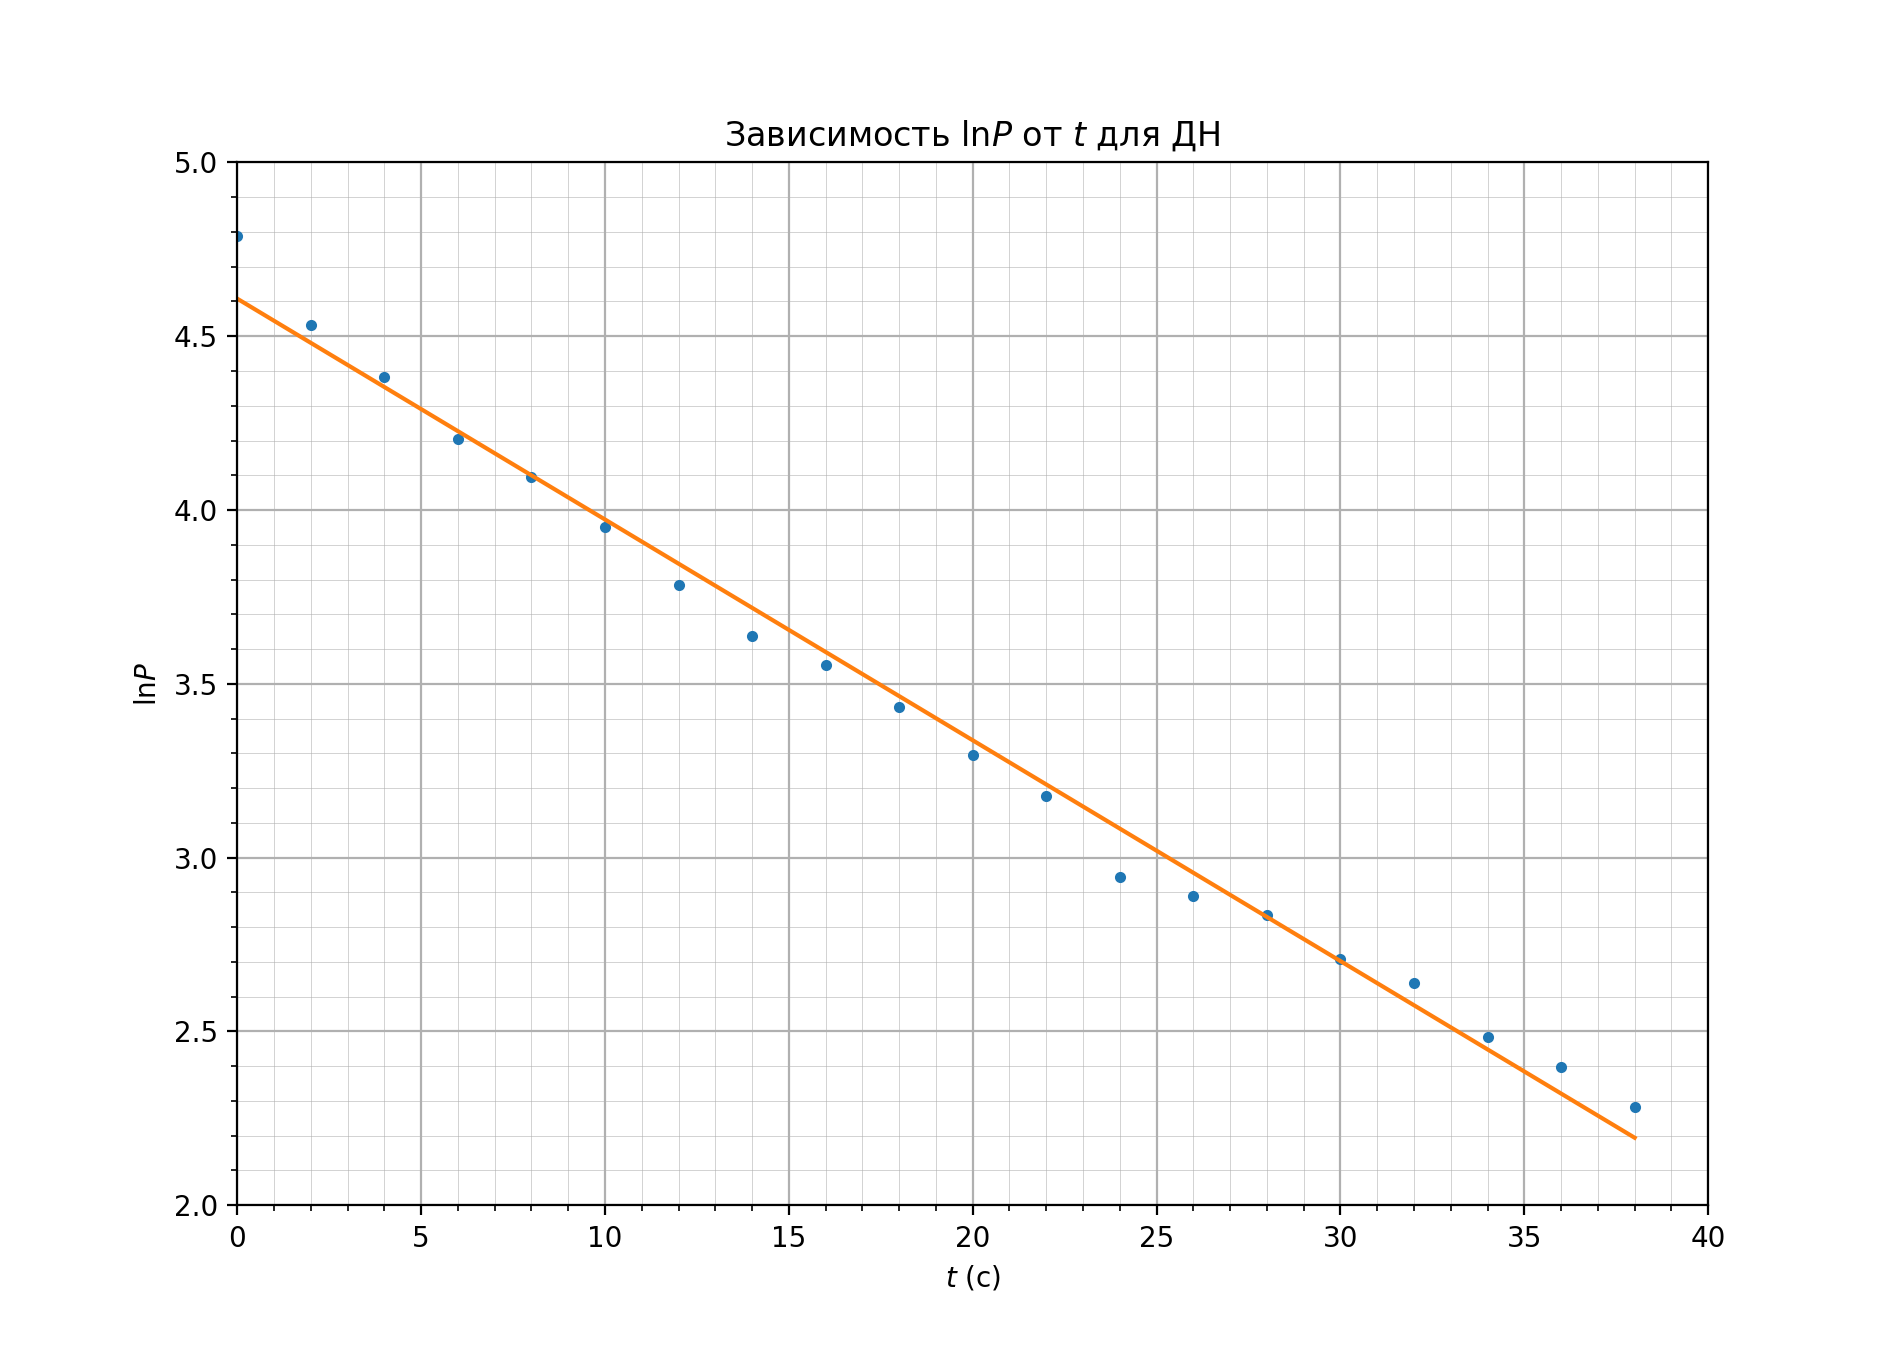

In [7]:
ln_p = np.array([math.log(y) for y in y0])
create_plot('$t$ (с)', '$\ln P$')
plt.xlim(0, 40)
plt.ylim(2, 5)
plt.title('Зависимость $\ln P$ от $t$ для ДН')
plt.plot(x0, ln_p, linestyle='', marker='.')
xdata = np.arange(0, 40, 2)
f = lambda x, a, b: a * x + b
tau_opt, tau_cov = curve_fit(f, xdata, ln_p)
plt.plot(xdata, f(xdata, *tau_opt))

$$dt = -\tau\frac{dP}{P}$$

$$t = -\tau\ln P$$

$$\ln P = -\frac{t}{\tau}$$

In [8]:
tau = -1 / tau_opt[0]
print('Постоянная времени откачки:' + ' ' * 2, round(tau, 2), 'с')
s0 = v1 / tau
data['S01'] = s0
print('Эффективная скорость откачки:', round(s0, 2), 'мл/с')

Постоянная времени откачки:   15.74 с
Эффективная скорость откачки: 67.35 мл/с


$$\frac{1}{S_0} = \frac{1}{S_\text{н}} + \frac{1}{U}$$

$$S_0 \approx 67,3 \ \frac{\text{мл}}{\text{с}}$$

По техническим данным о насосе
$$S_\text{н} = 0,5 \ \frac{\text{м}^3}{\text{ч}} \approx 138,9 \ \frac{\text{мл}}{\text{с}}.$$

In [9]:
s1 = 138.9
u = s0 * s1 / (s1 - s0)
data['U1'] = u
print('Пропускная способность:', round(u, 2), 'мл/с')

Пропускная способность: 130.73 мл/с


Отсюда $$U \approx 130,7 \ \frac{\text{мл}}{\text{с}}.$$

## 4. Оценим эффективную скорость откачки системы турбомолекулярным насосом.
Из файла возьмем данные зависимости давления в камере К от времени откачки насосом ТМН. По зависимости $\ln P$ от $t$ определим постоянную времени откачки $\tau$ в диапазоне давлений $10^{-5}$&mdash;$10^{-3}$ мбар. Зная объем камеры К установки $V_0$, рассчитаем эффективную скорость ее откачки $S_0$. Определим пропускную способность диафрагм $U$.

<IPython.core.display.Javascript object>


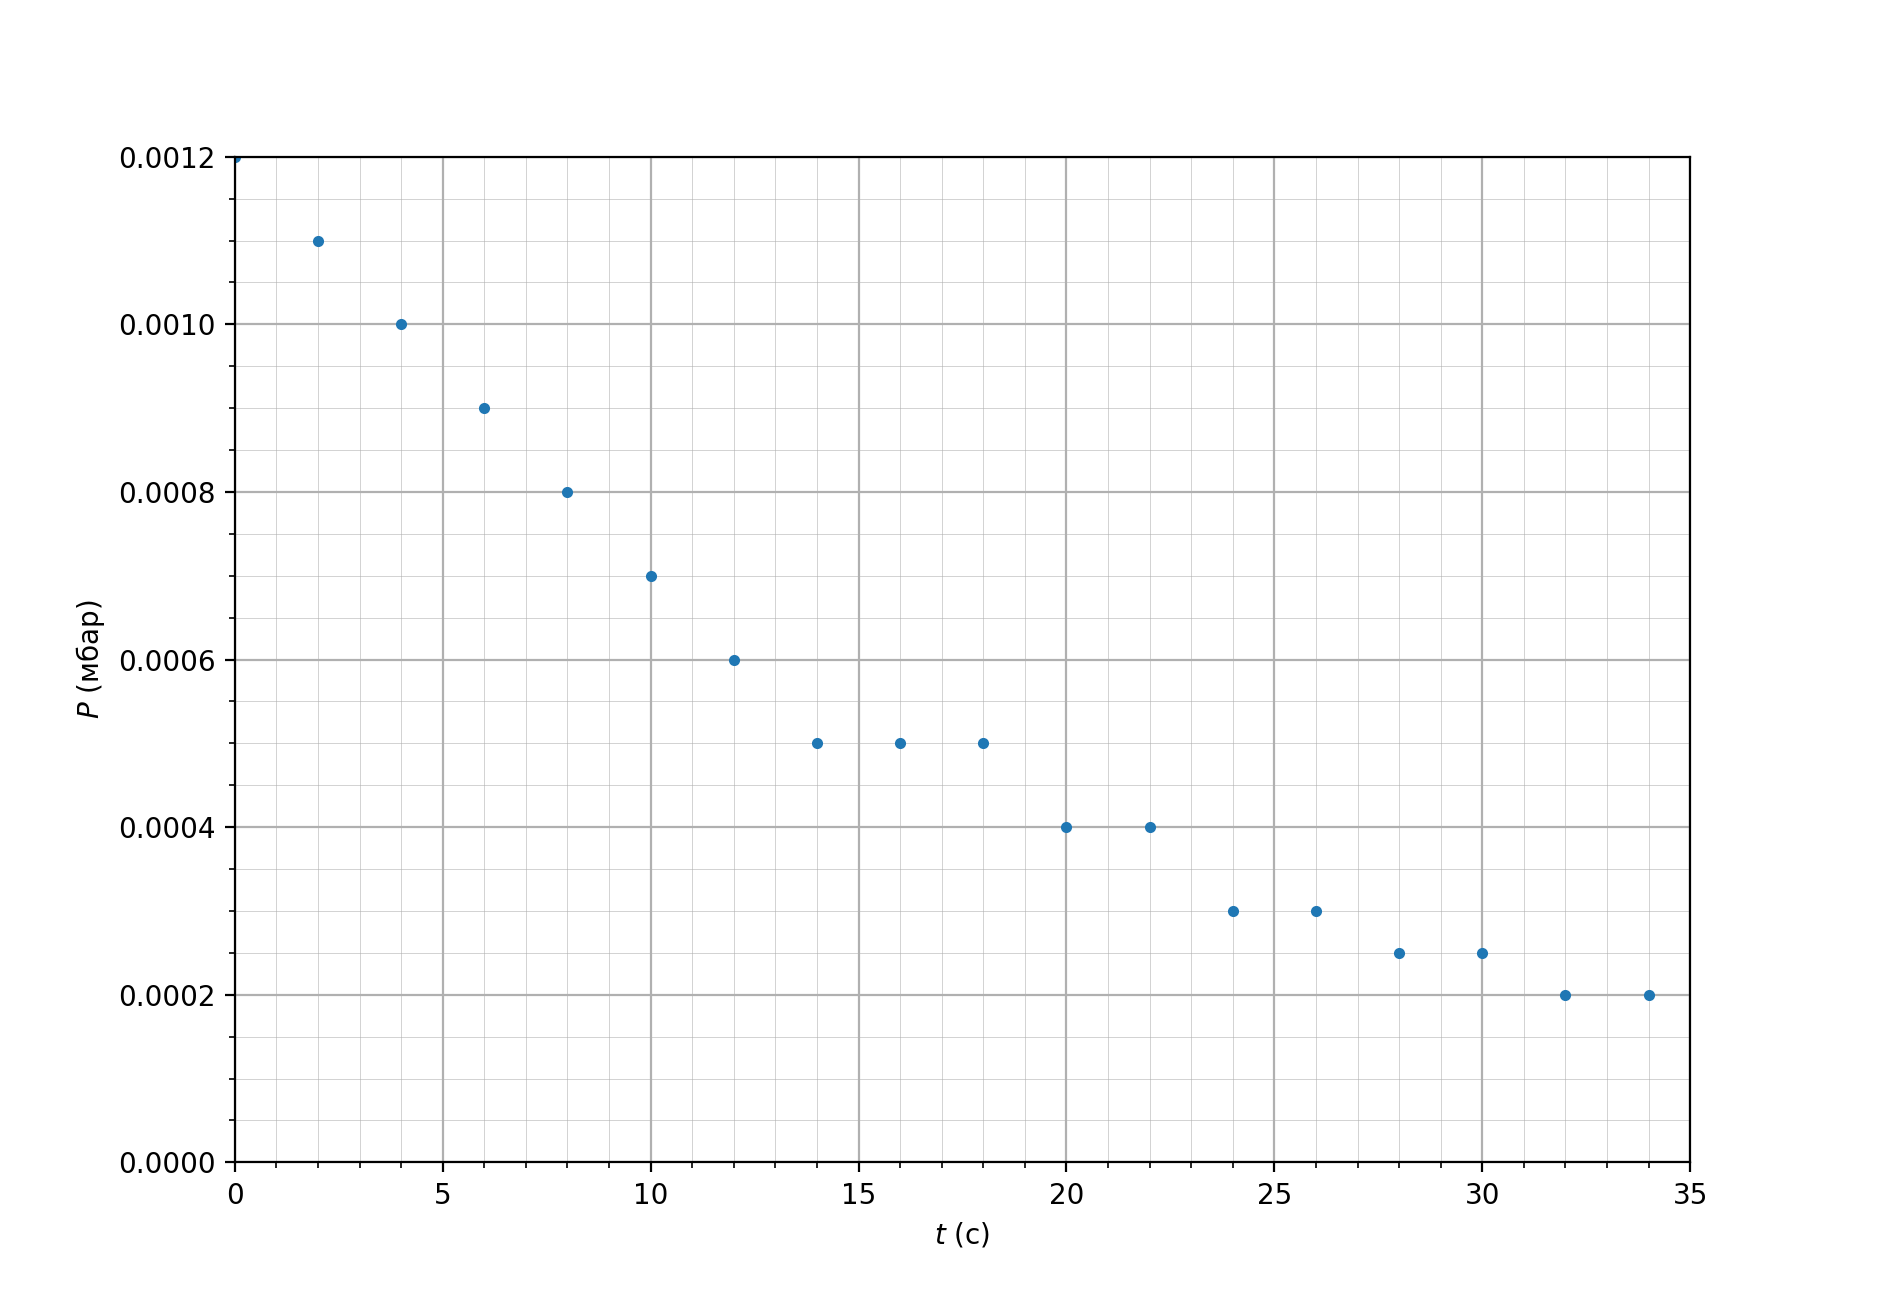

In [10]:
x1 = time[2663:2681] - time[2663]
y1 = p1[2663:2681]; y1[3] = 0.0009
create_plot('$t$ (с)', '$P$ (мбар)')
plt.xlim(0, 35)
plt.ylim(0, .0012)
plt.plot(x1, y1, linestyle='', marker='.')

<IPython.core.display.Javascript object>


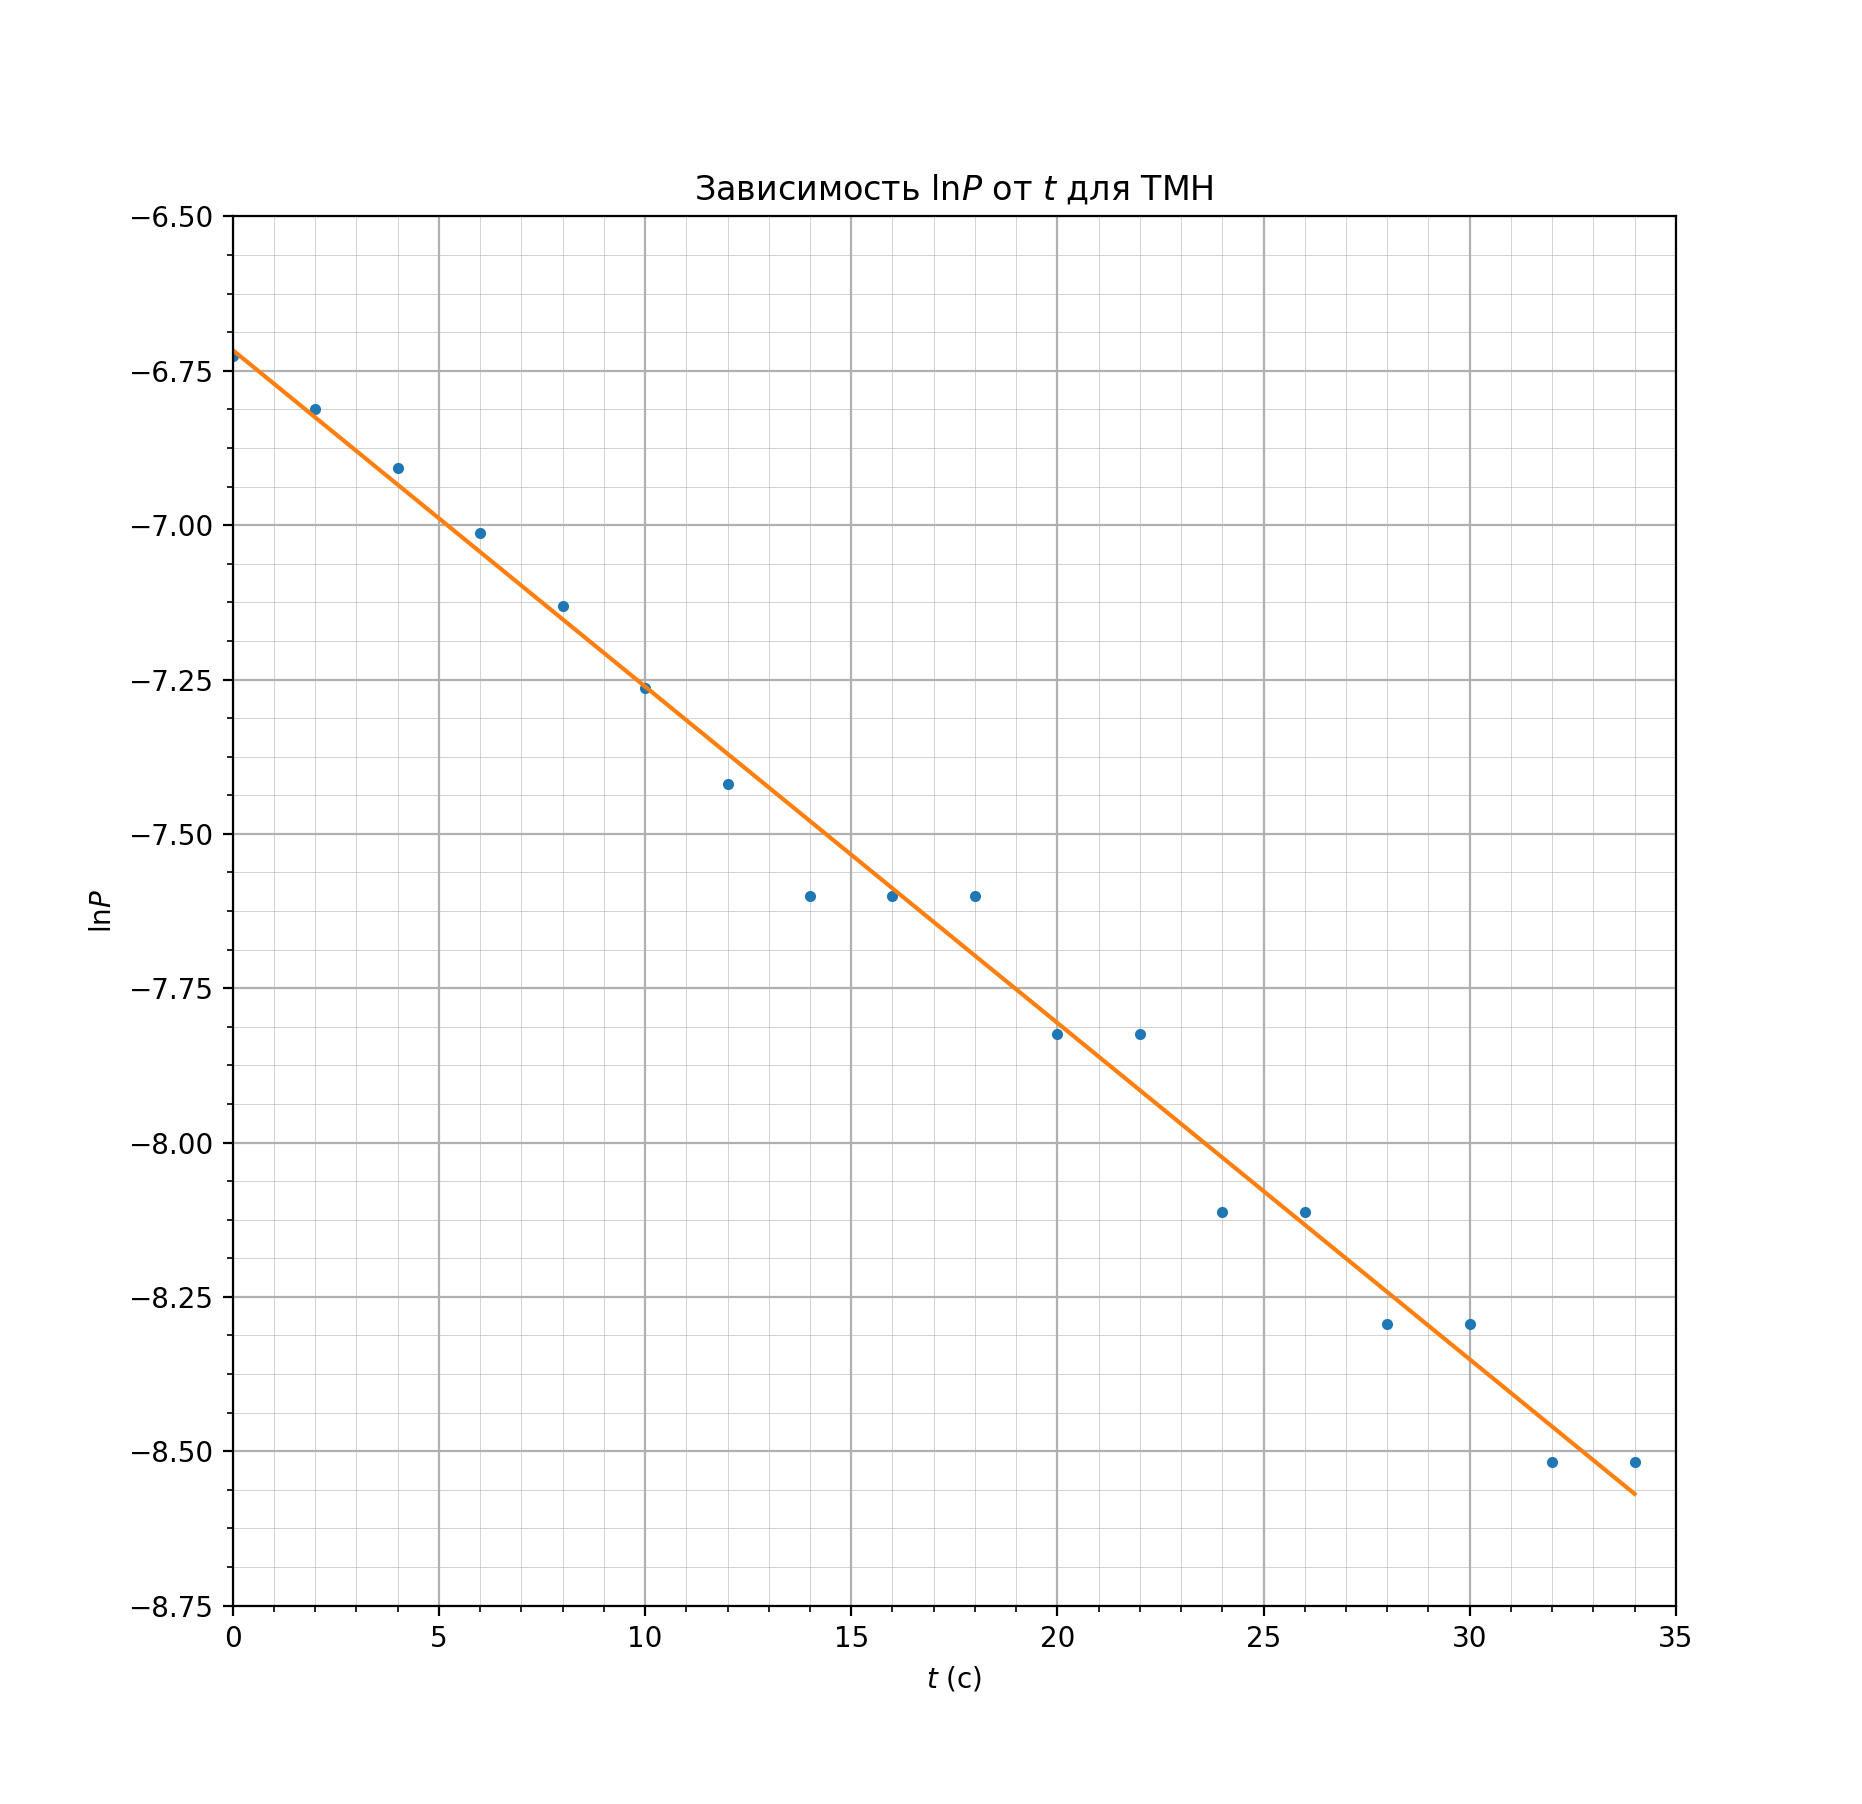

In [11]:
ln_p1 = np.array([math.log(y) for y in y1])
create_plot('$t$ (с)', '$\ln P$')
plt.xlim(0, 35)
plt.ylim(-8.75, -6.5)
plt.title('Зависимость $\ln P$ от $t$ для ТМН')
plt.plot(x1, ln_p1, linestyle='', marker='.')
xdata = np.arange(0, 35, 2)
tau_opt, tau_cov = curve_fit(f, xdata, ln_p1)
plt.plot(xdata, f(xdata, *tau_opt))

In [12]:
tau = -1 / tau_opt[0]
print('Постоянная времени откачки:' + ' ' * 2, round(tau, 2), 'c')
s0 = v1 / tau
data['S02'] = s0
print('Эффективная скорость откачки:', round(s0, 2), 'мл/с')

Постоянная времени откачки:   18.35 c
Эффективная скорость откачки: 57.76 мл/с


$$S_0 \approx 57,8 \ \frac{\text{мл}}{\text{с}}$$
$$S_\text{н} = 67 \ \frac{\text{л}}{\text{с}}$$

In [13]:
s1 = 67e3
u = s0 * s1 / (s1 - s0)
data['U2'] = u
print('Пропускная способность:', round(u, 2), 'мл/с')

Пропускная способность: 57.81 мл/с


$$U \approx 57,8 \ \frac{\text{мл}}{\text{с}}$$

## 5.
Из файла возьмем данные зависимости давления в камере К от времени натекания после перекрытия откачки шибером ШЗ. Рассчитаем натекание $Q_\text{н}$.

$$Q_\text{н} = V\frac{P_\text{к} - P_\text{н}}{\Delta t}$$

<IPython.core.display.Javascript object>


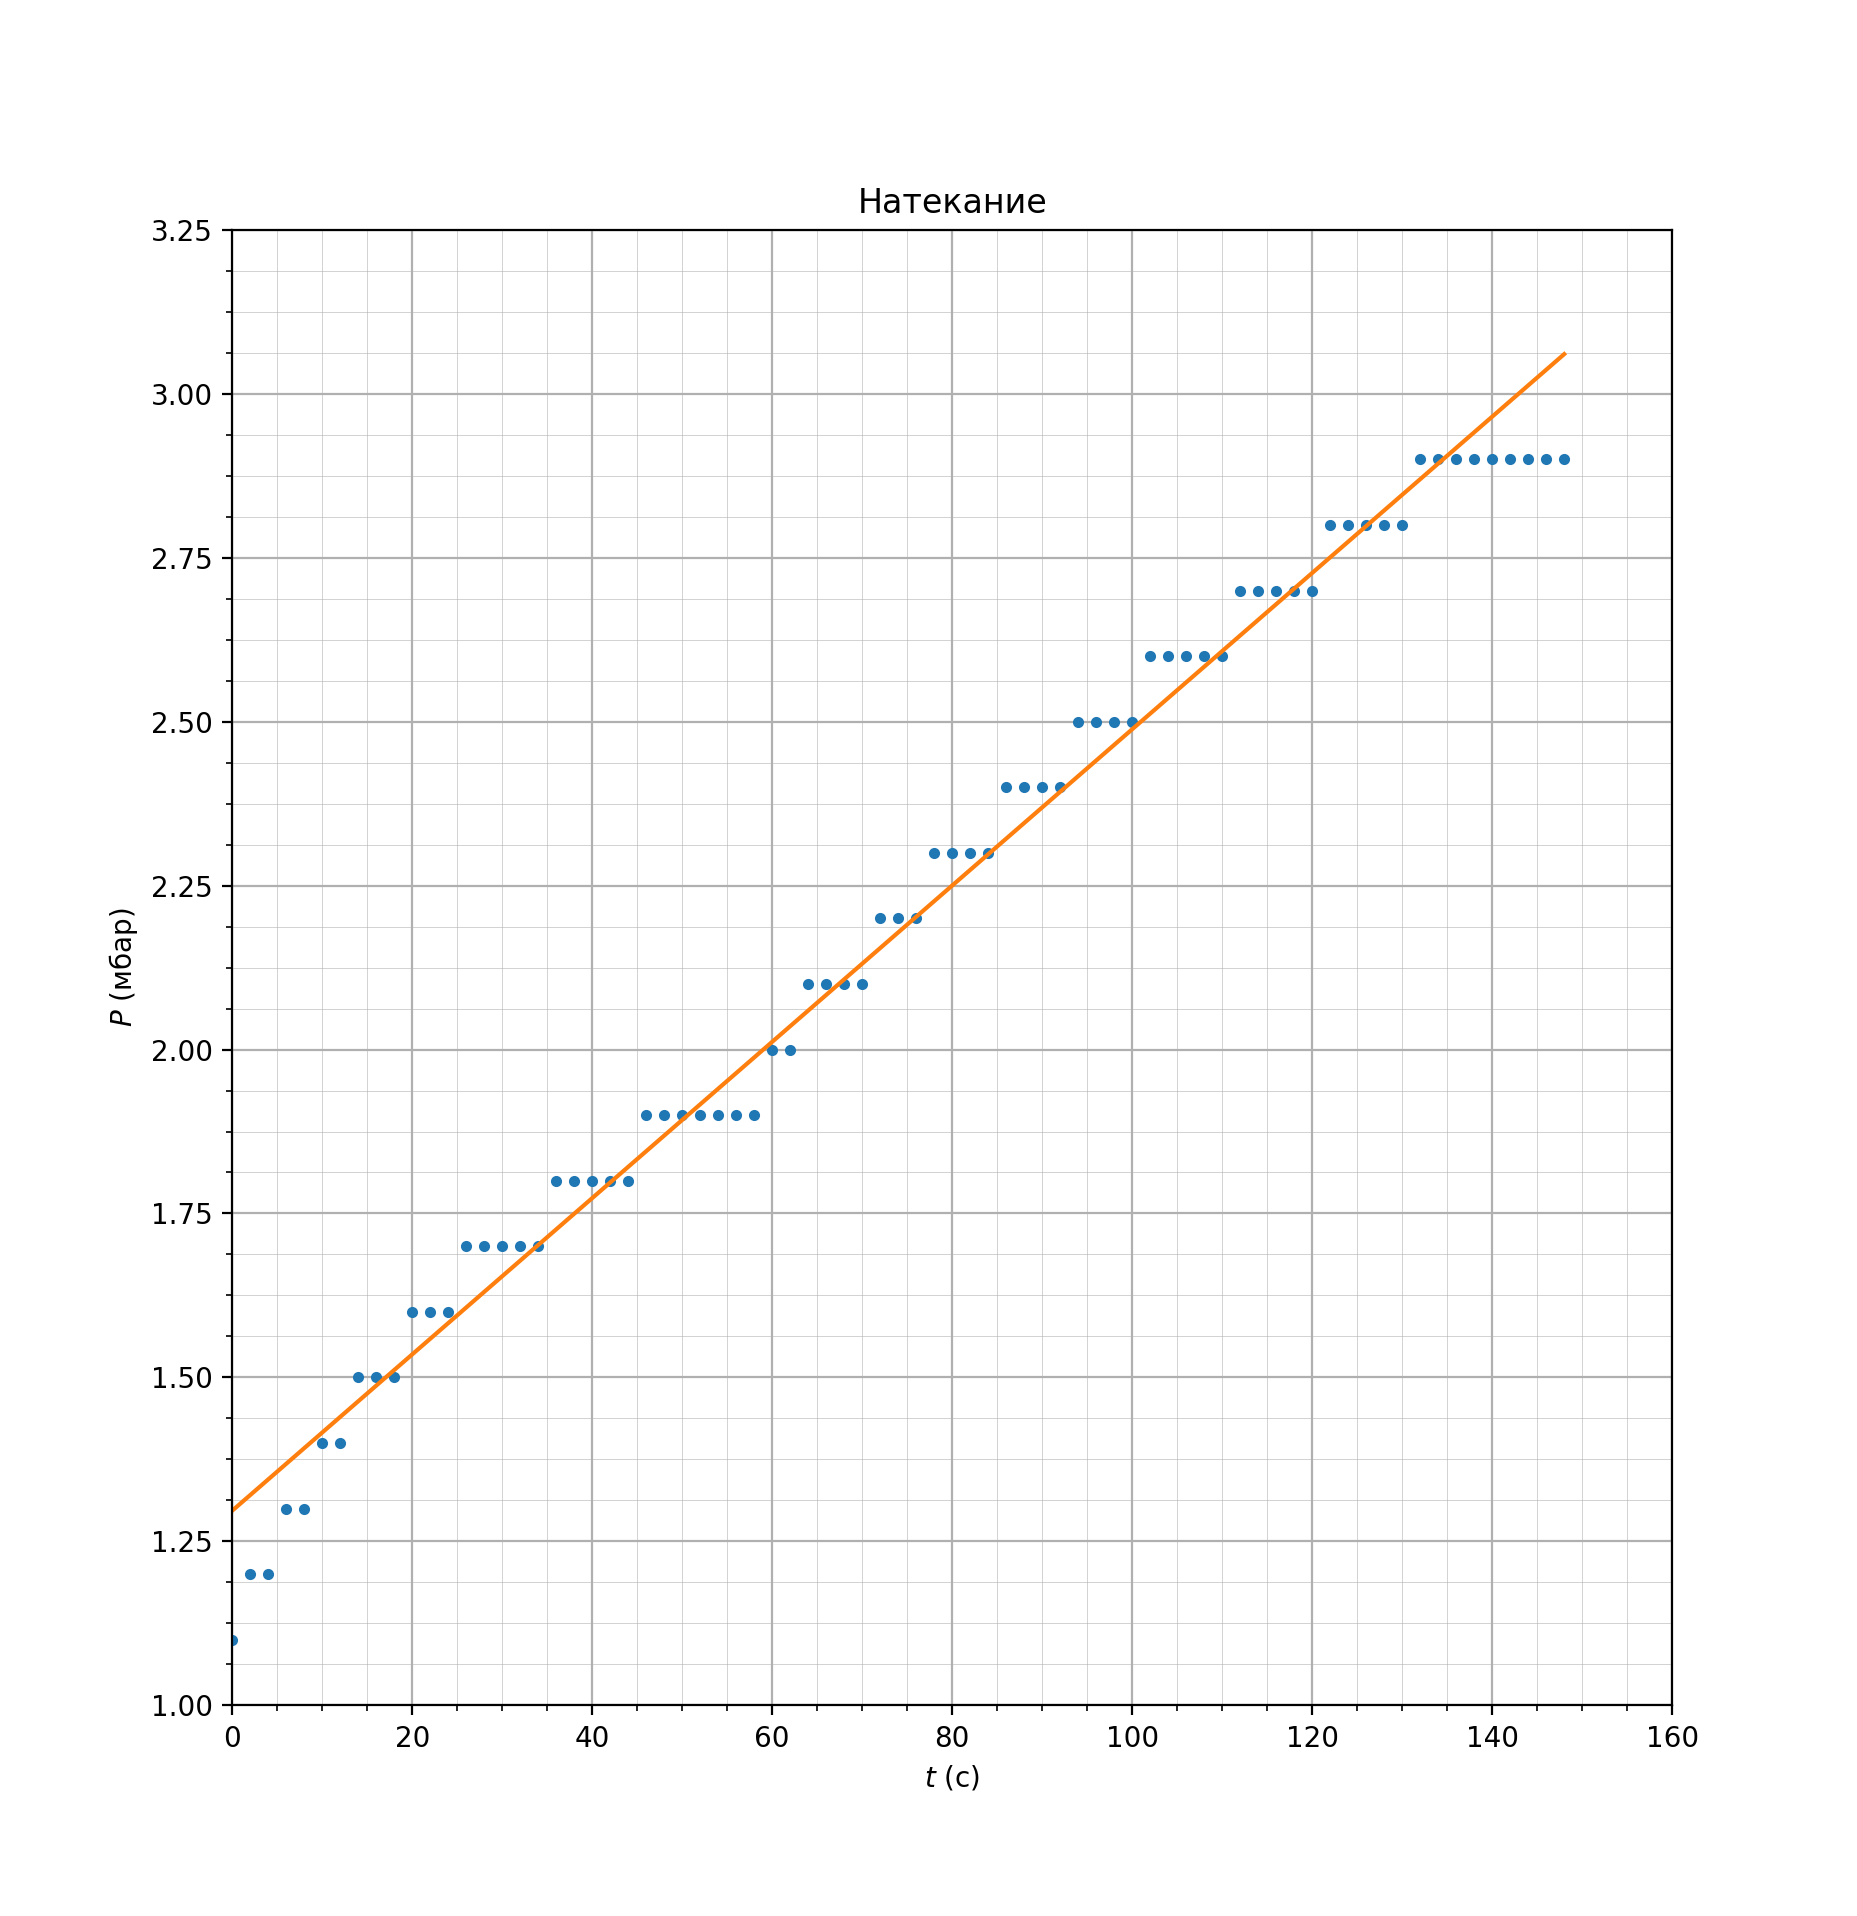

In [14]:
x2 = time[3605:3680] - time[3605]
y2 = p1[3605:3680]
x2 = np.array([float(x) for x in x2])
y2 = np.array([float(y) for y in y2])
q_opt, q_cov = curve_fit(f, x2, y2)
create_plot('$t$ (с)', '$P$ (мбар)')
plt.xlim(0, 160)
plt.ylim(1, 3.25)
plt.title('Натекание')
plt.plot(x2, y2, linestyle='', marker='.')
plt.plot(x2, f(x2, *q_opt))

In [15]:
q = v3 * q_opt[0]
print('Натекание:', round(q, 2), 'мл мбар / с')

Натекание: 5.01 мл мбар / с


$$Q_\text{н} \approx 5,0 \ \frac{\text{мл}\cdot\text{мбар}}{\text{c}}$$

$$P_1S_0^\text{ДН} \approx 1,2\cdot 67,3 \ \frac{\text{мл}\cdot\text{мбар}}{\text{c}} \approx 80 \ \frac{\text{мл}\cdot\text{мбар}}{\text{c}}$$
$$P_1S_0^\text{ДН} \approx 1,2\cdot 57,8 \ \frac{\text{мл}\cdot\text{мбар}}{\text{c}} \approx 70 \ \frac{\text{мл}\cdot\text{мбар}}{\text{c}}$$

Как можно видеть, величины больше $Q_\text{н}$ всего на порядок, следовательно условие $Q_\text{н} \ll P_1S_0$ не выполняется.

## 6.
Оценим число Кнудсена для предельных давлений при форвакуумной и высоковакуумной откачке в разных частях вакуумной системы.

$$\mbox{Kn} = \frac{kT}{\sqrt{2}\pi\sigma^2 PL}$$

In [20]:
print('Предельное давление:\n\nпоказания В1:', min(p1), 'мбар', '\nпоказания В2:', min(p2), 'мбар')

Предельное давление:

показания В1: 0.0001 мбар 
показания В2: 6.7e-06 мбар


Предельное давление &mdash; $10^{-4}$ мбар $= 0,01$ Па, характерный размер $L \approx 0,1$ м, поперечный расмер молекулы воздуха $\sigma \approx 3\cdot 10^{-10}$ м.

In [18]:
k = 1.38e-23
T = 300
pm = min(p2)
L = 0.1
sgm = 3e-10
Kn = (k * T) / (math.sqrt(2) * math.pi * sgm ** 2 * pm * L)
print('Число Кнудсена:', round(Kn, 2))

Число Кнудсена: 15453.19


$$\mbox{Kn} \sim 10^4 \gg 1,$$
значит режим можно считать _кнудсеновским_.

## 7. Оценим ошибку $S_0$, $U$ и $Q_\text{н}$.

$$\varepsilon_S^2 = \varepsilon_U^2 = \varepsilon_P^2 + \varepsilon_V^2$$
$$\varepsilon_Q^2 = \varepsilon_S^2 + \varepsilon_P^2 = 2\varepsilon_P^2 + \varepsilon_V^2$$
$$\varepsilon_V = \varepsilon_P$$

Из характеристик вакуумметра
$$\varepsilon_P \approx 0,05.$$

In [19]:
eps = 0.05 * math.sqrt(2)
print('sigma S:', eps * data['S01'], eps * data['S02'])
print('sigma U:', eps * data['U1'], eps * data['U2'])
print('sigma Q:', eps * q)

sigma S: 4.762103134495625 4.084087060514271
sigma U: 9.244192863100102 4.087610807563886
sigma Q: 0.35446663101515563


## Результат

$$S_0^\text{ДН} = 67,3 \pm 4,8 \ \frac{\text{мл}}{\text{с}}$$
$$S_0^\text{ТМН} = 57,8 \pm 4 \ \frac{\text{мл}}{\text{с}}$$

$$U_\text{ДН} = 130,7 \pm 9,2 \ \frac{\text{мл}}{\text{с}}$$
$$U_\text{ТМН} = 57,8 \pm 4 \ \frac{\text{мл}}{\text{с}}$$

$$Q_\text{н} = 5,0 \pm 0,4 \ \frac{\text{мл}\cdot\text{мбар}}{\text{c}}$$

## Вывод

В данной работе изучался метод получения вакуума. Было достигнуто очень разреженное состояние газа с числом Кнудсена порядка $10^4$. Это в некотором приближении можно назвать вакуумом. Также были получены значения эффективной скорости откачки, пропускной способности и натекания.